In [1]:
pip install pandas numpy scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 51.5 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 55.8 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.7 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 55.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 50.1 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 42.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 50.2 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 56.3 MB/s  0:00:006m0:00:01
   ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━  3/13 [numpy]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━  6/13 [fonttools]  WARNING: The scripts fon

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [3]:
#importing data, only selecting numeric columns with less than 50% of the data missing

df = pd.read_csv('merged.csv', index_col=0)
numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.loc[:, numeric_df.isnull().mean() < 0.5]

In [4]:
#dropping the rows with NA still, i'll be doing another round of PCA using imputation
numeric_df = numeric_df.dropna()

print(numeric_df.shape)
print(list(numeric_df.columns))

(4835, 30)
['player_id', 'season_x', 'usage_passing_downs', 'usage_standard_downs', 'usage_third_down', 'usage_second_down', 'usage_first_down', 'usage_rush', 'usage_var_pass', 'usage_overall', 'avg_ppa_passing_downs', 'avg_ppa_standard_downs', 'avg_ppa_third_down', 'avg_ppa_second_down', 'avg_ppa_first_down', 'avg_ppa_var_pass', 'avg_ppa_all', 'total_ppa_passing_downs', 'total_ppa_standard_downs', 'total_ppa_third_down', 'total_ppa_second_down', 'total_ppa_first_down', 'total_ppa_rush', 'total_ppa_var_pass', 'total_ppa_all', 'receiving_LONG', 'receiving_REC', 'receiving_TD', 'receiving_YDS', 'receiving_YPR']


In [5]:
#scaling

scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_df)

pca = PCA()
pca.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

Text(0.5, 1.0, 'Scree Plot')

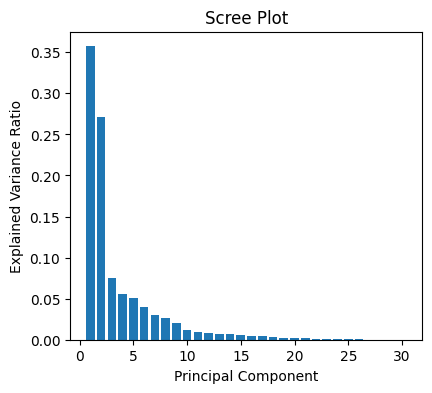

In [6]:
#scree plot
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained)+1), explained)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

Text(0.5, 1.0, 'Cumulative Variance')

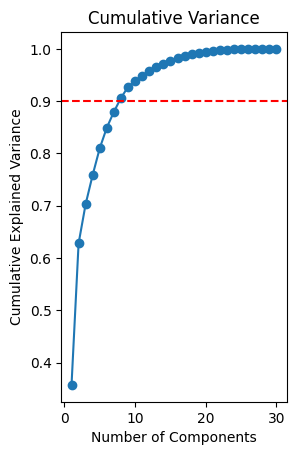

In [ ]:
#cumulative variance explained plot, with a benchmark at 90%

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.axhline(0.90, color='r', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance')

In [13]:
#pca to decide how many components we want
n_components_90 = np.argmax(cumulative >= 0.90) + 1
pca_final = PCA(n_components=n_components_90)
X_pca = pca_final.fit_transform(X_scaled)

Text(0.5, 1.0, 'PCA: First Two Components')

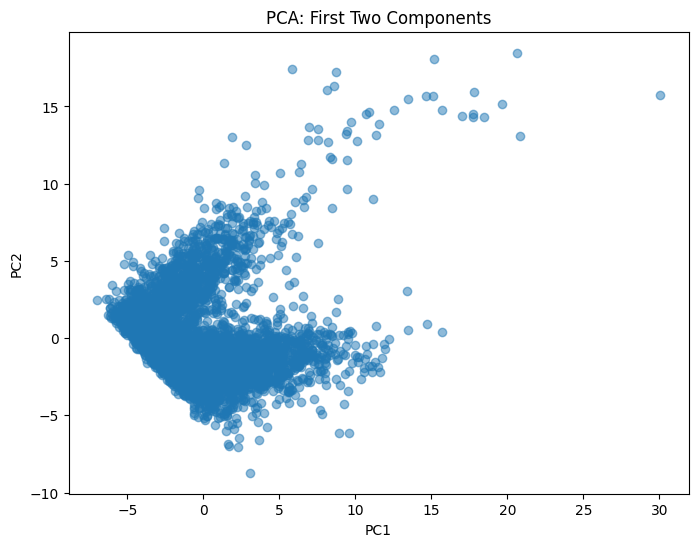

In [ ]:
#comparing the first two components

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Components')

#the output from this graph suggests that there is a standard, dense cluster of players in the bottom right
#but there begin to be two types of outliers. The ones that skew simply just sideways as we see with that
#lower sideways spike and the ones that skew to the up and right, with that crazy outlier in the top right.

In [ ]:
#Just wanted to see that outlier on the top right, SHOCKING it is marcus mariota. 
outlier_idx = np.argmax(X_pca[:, 0])
print(numeric_df.iloc[outlier_idx])
print(df.loc[numeric_df.index[outlier_idx], 'name_x'])

player_id                   511459.000
season_x                      2014.000
usage_passing_downs              0.611
usage_standard_downs             0.472
usage_third_down                 0.596
usage_second_down                0.500
usage_first_down                 0.492
usage_rush                       0.170
usage_var_pass                   0.942
usage_overall                    0.510
avg_ppa_passing_downs            0.662
avg_ppa_standard_downs           0.549
avg_ppa_third_down               0.880
avg_ppa_second_down              0.505
avg_ppa_first_down               0.515
avg_ppa_var_pass                 0.527
avg_ppa_all                      0.586
total_ppa_passing_downs        125.802
total_ppa_standard_downs       213.143
total_ppa_third_down           103.840
total_ppa_second_down           91.456
total_ppa_first_down           134.438
total_ppa_rush                  89.267
total_ppa_var_pass             249.678
total_ppa_all                  338.945
receiving_LONG           

In [16]:
#printing out the top 10 features that explain the variance
loadings = pd.DataFrame(
    pca_final.components_.T,
    index=numeric_df.columns,
    columns=[f'PC{i+1}' for i in range(n_components_90)]
)

print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

total_ppa_all               0.290996
total_ppa_var_pass          0.284024
total_ppa_passing_downs     0.274674
total_ppa_standard_downs    0.257049
total_ppa_second_down       0.255004
total_ppa_third_down        0.252333
receiving_YDS               0.245893
total_ppa_first_down        0.242313
receiving_TD                0.231713
receiving_REC               0.229662
Name: PC1, dtype: float64


In [17]:
#now doing much of the process over again, but using imputing instead of removing data

from sklearn.impute import SimpleImputer

In [19]:
#redoing the analysis but using the imputer strategy, still removing columns with too many NAs

numeric_df = df.select_dtypes(include='number')
numeric_df = numeric_df.loc[:, numeric_df.isnull().mean() < 0.5]

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(numeric_df)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

pca = PCA()
pca.fit(X_scaled)

,"n_components n_components: int, float or 'mle', default=NoneNumber of components to keep.if n_components is not set all components are kept:: n_components == min(n_samples, n_features)If ``n_components == 'mle'`` and ``svd_solver == 'full'``, Minka'sMLE is used to guess the dimension. Use of ``n_components == 'mle'``will interpret ``svd_solver == 'auto'`` as ``svd_solver == 'full'``.If ``0 < n_components < 1`` and ``svd_solver == 'full'``, select thenumber of components such that the amount of variance that needs to beexplained is greater than the percentage specified by n_components.If ``svd_solver == 'arpack'``, the number of components must bestrictly less than the minimum of n_features and n_samples.Hence, the None case results in:: n_components == min(n_samples, n_features) - 1",None
,"copy copy: bool, default=TrueIf False, data passed to fit are overwritten and runningfit(X).transform(X) will not yield the expected results,use fit_transform(X) instead.",True
,"whiten whiten: bool, default=FalseWhen True (False by default) the `components_` vectors are multipliedby the square root of n_samples and then divided by the singular valuesto ensure uncorrelated outputs with unit component-wise variances.Whitening will remove some information from the transformed signal(the relative variance scales of the components) but can sometimeimprove the predictive accuracy of the downstream estimators bymaking their data respect some hard-wired assumptions.",False
,"svd_solver svd_solver: {'auto', 'full', 'covariance_eigh', 'arpack', 'randomized'}, default='auto'""auto"" : The solver is selected by a default 'auto' policy is based on `X.shape` and `n_components`: if the input data has fewer than 1000 features and more than 10 times as many samples, then the ""covariance_eigh"" solver is used. Otherwise, if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient ""randomized"" method is selected. Otherwise the exact ""full"" SVD is computed and optionally truncated afterwards.""full"" : Run exact full SVD calling the standard LAPACK solver via `scipy.linalg.svd` and select the components by postprocessing""covariance_eigh"" : Precompute the covariance matrix (on centered data), run a classical eigenvalue decomposition on the covariance matrix typically using LAPACK and select the components by postprocessing. This solver is very efficient for n_samples >> n_features and small n_features. It is, however, not tractable otherwise for large n_features (large memory footprint required to materialize the covariance matrix). Also note that compared to the ""full"" solver, this solver effectively doubles the condition number and is therefore less numerical stable (e.g. on input data with a large range of singular values).""arpack"" : Run SVD truncated to `n_components` calling ARPACK solver via `scipy.sparse.linalg.svds`. It requires strictly `0 < n_components < min(X.shape)`""randomized"" : Run randomized SVD by the method of Halko et al... versionadded:: 0.18.0.. versionchanged:: 1.5 Added the 'covariance_eigh' solver.",'auto'
,"tol tol: float, default=0.0Tolerance for singular values computed by svd_solver == 'arpack'.Must be of range [0.0, infinity)... versionadded:: 0.18.0",0.0
,"iterated_power iterated_power: int or 'auto', default='auto'Number of iterations for the power method computed bysvd_solver == 'randomized'.Must be of range [0, infinity)... versionadded:: 0.18.0",'auto'
,"n_oversamples n_oversamples: int, default=10This parameter is only relevant when `svd_solver=""randomized""`.It corresponds to the additional number of random vectors to sample therange of `X` so as to ensure proper conditioning. See:func:`~sklearn.utils.extmath.randomized_svd` for more details... versionadded:: 1.1",10
,"power_iteration_normalizer power_iteration_normalizer: {'auto', 'QR', 'LU', 'none'}, default='auto'Power iteration normalizer for randomized S

Text(0.5, 1.0, 'Scree Plot')

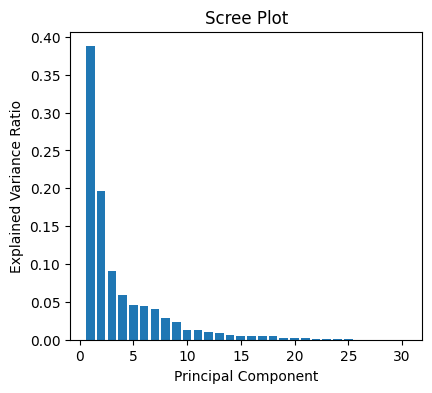

In [20]:
#scree plot
explained = pca.explained_variance_ratio_
cumulative = np.cumsum(explained)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.bar(range(1, len(explained)+1), explained)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

Text(0.5, 1.0, 'Cumulative Variance')

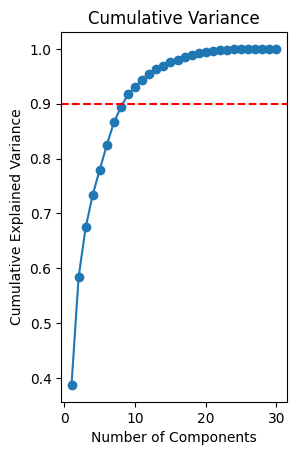

In [ ]:
#cumulative variance explained plot, with a benchmark at 90%

plt.subplot(1, 2, 2)
plt.plot(range(1, len(cumulative)+1), cumulative, marker='o')
plt.axhline(0.90, color='r', linestyle='--', label='90% threshold')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Variance')

#this time the variance is explained at slightly more components, with 8 just hitting under the threshold

In [22]:
#pca to decide how many components we want
n_components_90 = np.argmax(cumulative >= 0.90) + 1
pca_final = PCA(n_components=n_components_90)
X_pca = pca_final.fit_transform(X_scaled)

Text(0.5, 1.0, 'PCA: First Two Components')

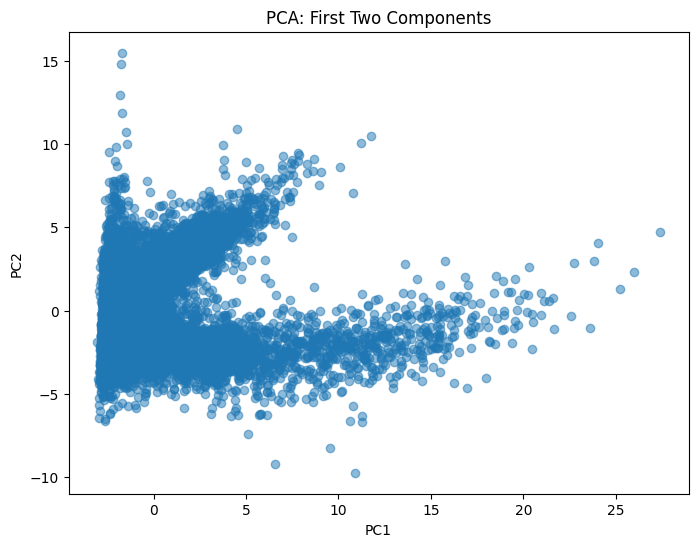

In [ ]:
#comparing the first two components

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA: First Two Components')

#here we have a much more distinct two peak situation, with the sideways peak and the up-right peak
#looking more clear

In [24]:
#printing out the top 10 features that explain the variance
loadings = pd.DataFrame(
    pca_final.components_.T,
    index=numeric_df.columns,
    columns=[f'PC{i+1}' for i in range(n_components_90)]
)

print(loadings['PC1'].abs().sort_values(ascending=False).head(10))

total_ppa_all              0.273212
total_ppa_third_down       0.271896
total_ppa_passing_downs    0.268646
usage_overall              0.261401
usage_passing_downs        0.258504
usage_second_down          0.257616
usage_third_down           0.255454
total_ppa_var_pass         0.252431
total_ppa_second_down      0.252020
usage_standard_downs       0.251710
Name: PC1, dtype: float64


In [ ]:
#the top 10 most significant columns are changed here dramatically, with 5 of the 10 being different.
#the consistent columns across both PCAs are total_ppa_standard_downs, total_ppa_first_down, receiving_YDS,
#receiving_TD, and receiving_REC.
#the columns that are present here that weren't in the previous 10 are usage_overall, usage_passing_downs, 
# usage_second_down, usage_third_down, and usage_standard_downs.